In [ ]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from sklearn.feature_extraction import image
from sklearn.cluster import KMeans
from skimage.filters import rank, threshold_otsu
from skimage.morphology import closing, square, disk
from skimage import exposure as hist, data, img_as_float
from skimage.segmentation import chan_vese
from skimage.feature import canny
from skimage.color import rgb2gray
from scipy import ndimage as ndi

In [ ]:
import os
from PIL import Image
import numpy as np

In [ ]:
def load_images_from_folder(folder, max_images=None):
    images = []
    for i, filename in enumerate(os.listdir(folder)):
        if max_images is not None and i >= max_images:
            break  # Stop if the maximum number of images is reached
        img_path = os.path.join(folder, filename)
        try:
            with Image.open(img_path) as img:
                images.append(np.array(img))
        except IOError:
            pass  # Handle errors or invalid image files if necessary
    return images


In [ ]:
def elbow(img, k):
    hist = []
    for kclusters in range(1, k):
        Km = KMeans(random_state=1, n_clusters=kclusters, init='k-means++').fit(img.reshape((-1,1)))
        hist.append(Km.inertia_)


In [ ]:
mal_images = "/content/malignant_segmented"
ben_images = "/content/benign_segmented"


mal = load_images_from_folder(mal_images)
ben = load_images_from_folder(ben_images)

mal_1 = load_images_from_folder(mal_images, max_images=5)
ben_1 = load_images_from_folder(ben_images, max_images=5)


In [ ]:
len(ben_images)

25

In [ ]:
len(mal_images)

28

In [ ]:
def binary(image):
    return image > threshold_otsu(image)

#https://campus.datacamp.com/courses/introduction-to-data-visualization-in-python/analyzing-time-series-and-images?ex=13
def equalize(image):
    return hist.equalize_hist(image)

#https://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm
def mean_filter(image, raio_disk):
    return rank.mean_percentile(image, selem = disk(raio_disk))

def preenche_bords(image):
    return ndi.binary_fill_holes(image)

#https://www.unioviedo.es/compnum/labs/PYTHON/intro_image.html

def load_images(paths):
    tmp = []
    for path in paths:
        tmp.append(imread(path))
    return tmp

def plot_any(arr, title = ''):
    plt.figure(figsize = (15, 25))
    for i in range(len(arr)):
        plt.subplot(1,len(arr),i + 1)
        plt.title(title)
        plt.imshow(arr[i]);


def plot_camadas(img):
    plt.figure(figsize = (15, 25))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img[:,:,i], cmap = 'gray');

def d2Kmeans(img, k):
    return KMeans(n_jobs=-1,
                  random_state=1,
                  n_clusters = k,
                  init='k-means++'
    ).fit(img.reshape((-1,1))).labels_.reshape(img.shape)

def merge_segmented_mask_ROI(uri_img, img_kluster):
    new_img = uri_img.copy()
    for ch in range(3):
        new_img[:,:, ch] *= img_kluster
    return new_img


def elbow(img, k):
    hist = []
    for kclusters in  range(1, k):
        Km = KMeans(n_jobs=-1, random_state=1, n_clusters = kclusters, init='k-means++').fit(img.reshape((-1,1)))
        hist.append(Km.inertia_)

    plt.figure(figsize = (15, 8))
    plt.grid()
    plt.plot(range(1, k), hist, 'o-')
    plt.ylabel('Soma das distâncias quadradas')
    plt.xlabel('k clusters')
    plt.title('Elbow')
    plt.show();



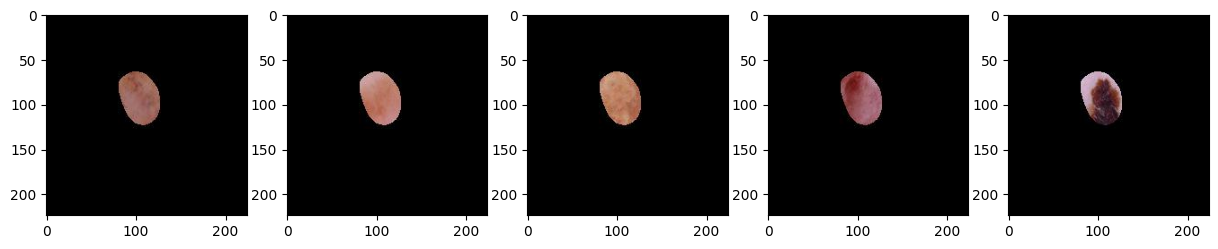

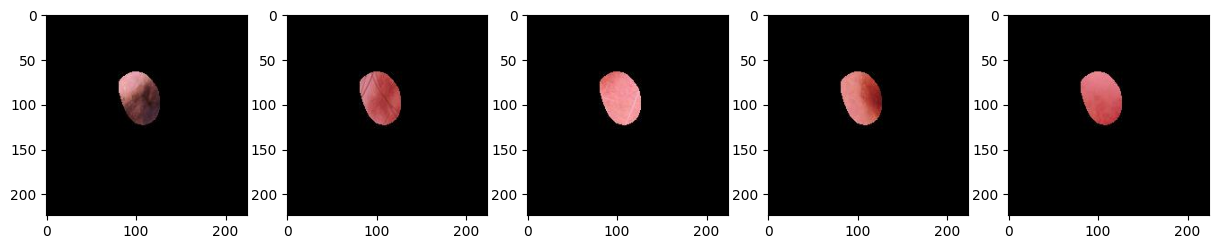

In [ ]:
plot_any(mal_1)
plot_any(ben_1)

In [ ]:
img_selected = mal[1]

In [ ]:
elbow(img_selected, 6)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

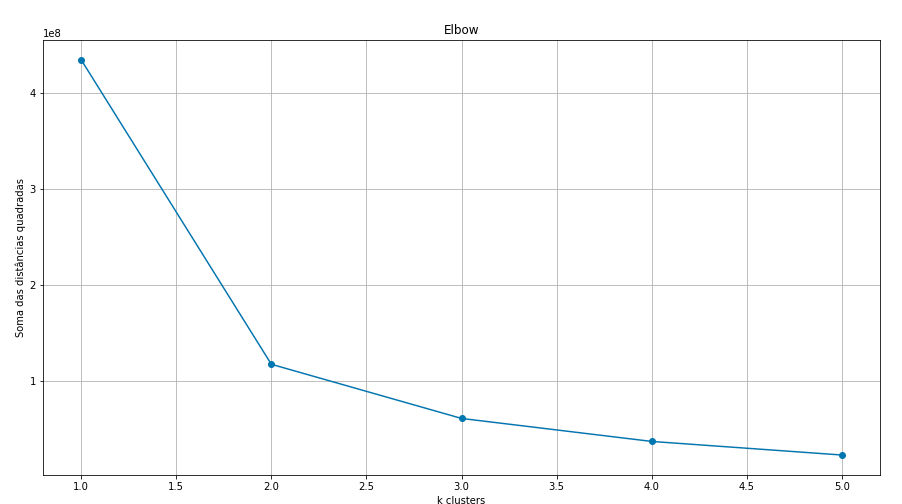

In [ ]:
k_klusters = 2

In [ ]:
!pip install scikit-image


In [ ]:
result_gray = d2Kmeans(rgb2grey(img_selected), k_klusters)
result_img = d2Kmeans(img_selected, k_klusters)

In [ ]:
klusters_gray = [result_gray == i for i in range(k_klusters)]
plot_any(klusters_gray)

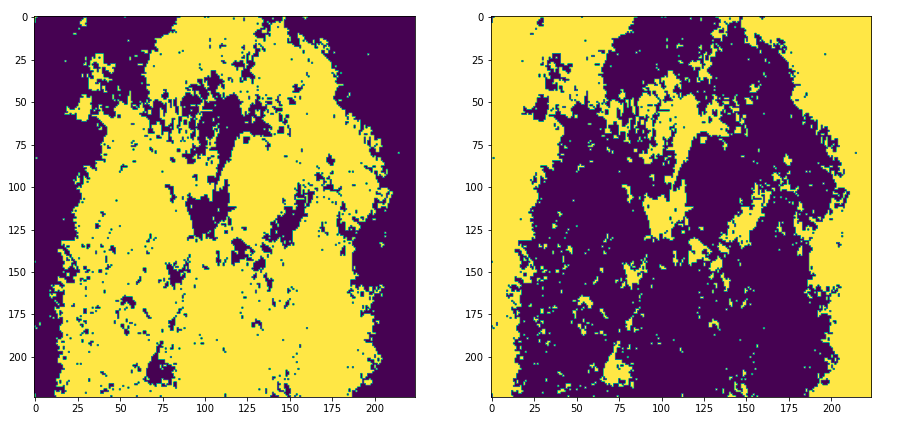